In [1]:
from pathlib import Path
import numpy as np
import panc_funcs as pc  # all fucntions used here are in the panc_funcs
pc.default_plotting_params()

# Set the path for the folder where data files are located

* DataFiles used: 'imputed.csv' and 'Cleaned_data.csv'


In [2]:
# to run it on your machine add the path to how you access the files below
data_folder = 

# First let's train a  support vector machine model using 5-fold cross-validation on the imputed dataset

 
 * figure below shows the average confusion matrices and the average classification accuracy for each group (Benign, Pre - Malignant and Malignant) 
 * the overall accuracy of this model is above chance (33%) but only slightly - 41% 

Mean Accuracy for all groups 41.0 %


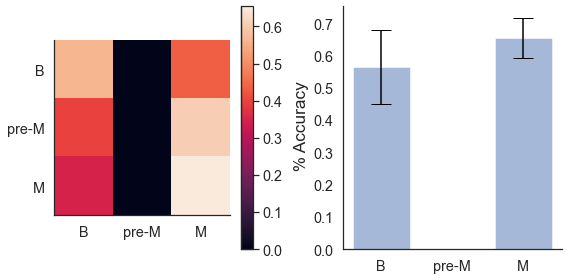

In [3]:
tm_imp, params_imp, names_imp = pc.load_data(data_folder, data = 'imp')
conf_ar_imp, conf_ar_imp_bm = pc.fit_model(params_imp, tm_imp)
pc.plot_corr_(conf_ar_imp,  labels = ['B', 'pre-M', 'M'], ticks = [0,1,2])
print('Mean Accuracy for all groups ' + str(np.round(np.mean(np.diag(np.mean(conf_ar_imp,0)))*100)) + ' %')



# We can also just classify Benign and Malignant groups 

* figure below shows the average confusion matrices and the average classification accuracy for only patients with Benign and Malignant lesions
* the overall accuracy of this model is also only slightly above chance - 60%

Mean Accuracy for just Malignant and Benign 60.0 %


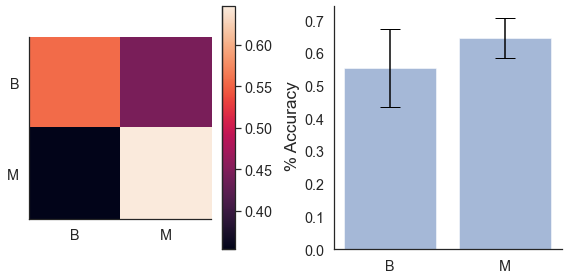

In [4]:
pc.plot_corr_(conf_ar_imp_bm,  labels = ['B', 'M'], ticks = [0,1])
print('Mean Accuracy for just Malignant and Benign ' + str(np.round(np.mean(np.diag(np.mean(conf_ar_imp_bm,0)))*100)) + ' %')



# Now let's try to do some feature selection. 

* Below I am plotting features/markers that are significantly different between Malignant and Benign groups.

* If a feature is categorical, a pie chart is created and if it's continuous, a histogram is created.

* The title of each subplot includes the feature name and the statistical significance.

* If a clinical parameter is categorical, then Kruskal–Wallis tests are used. If a clinical parameter is continuous, then t-tests are used.



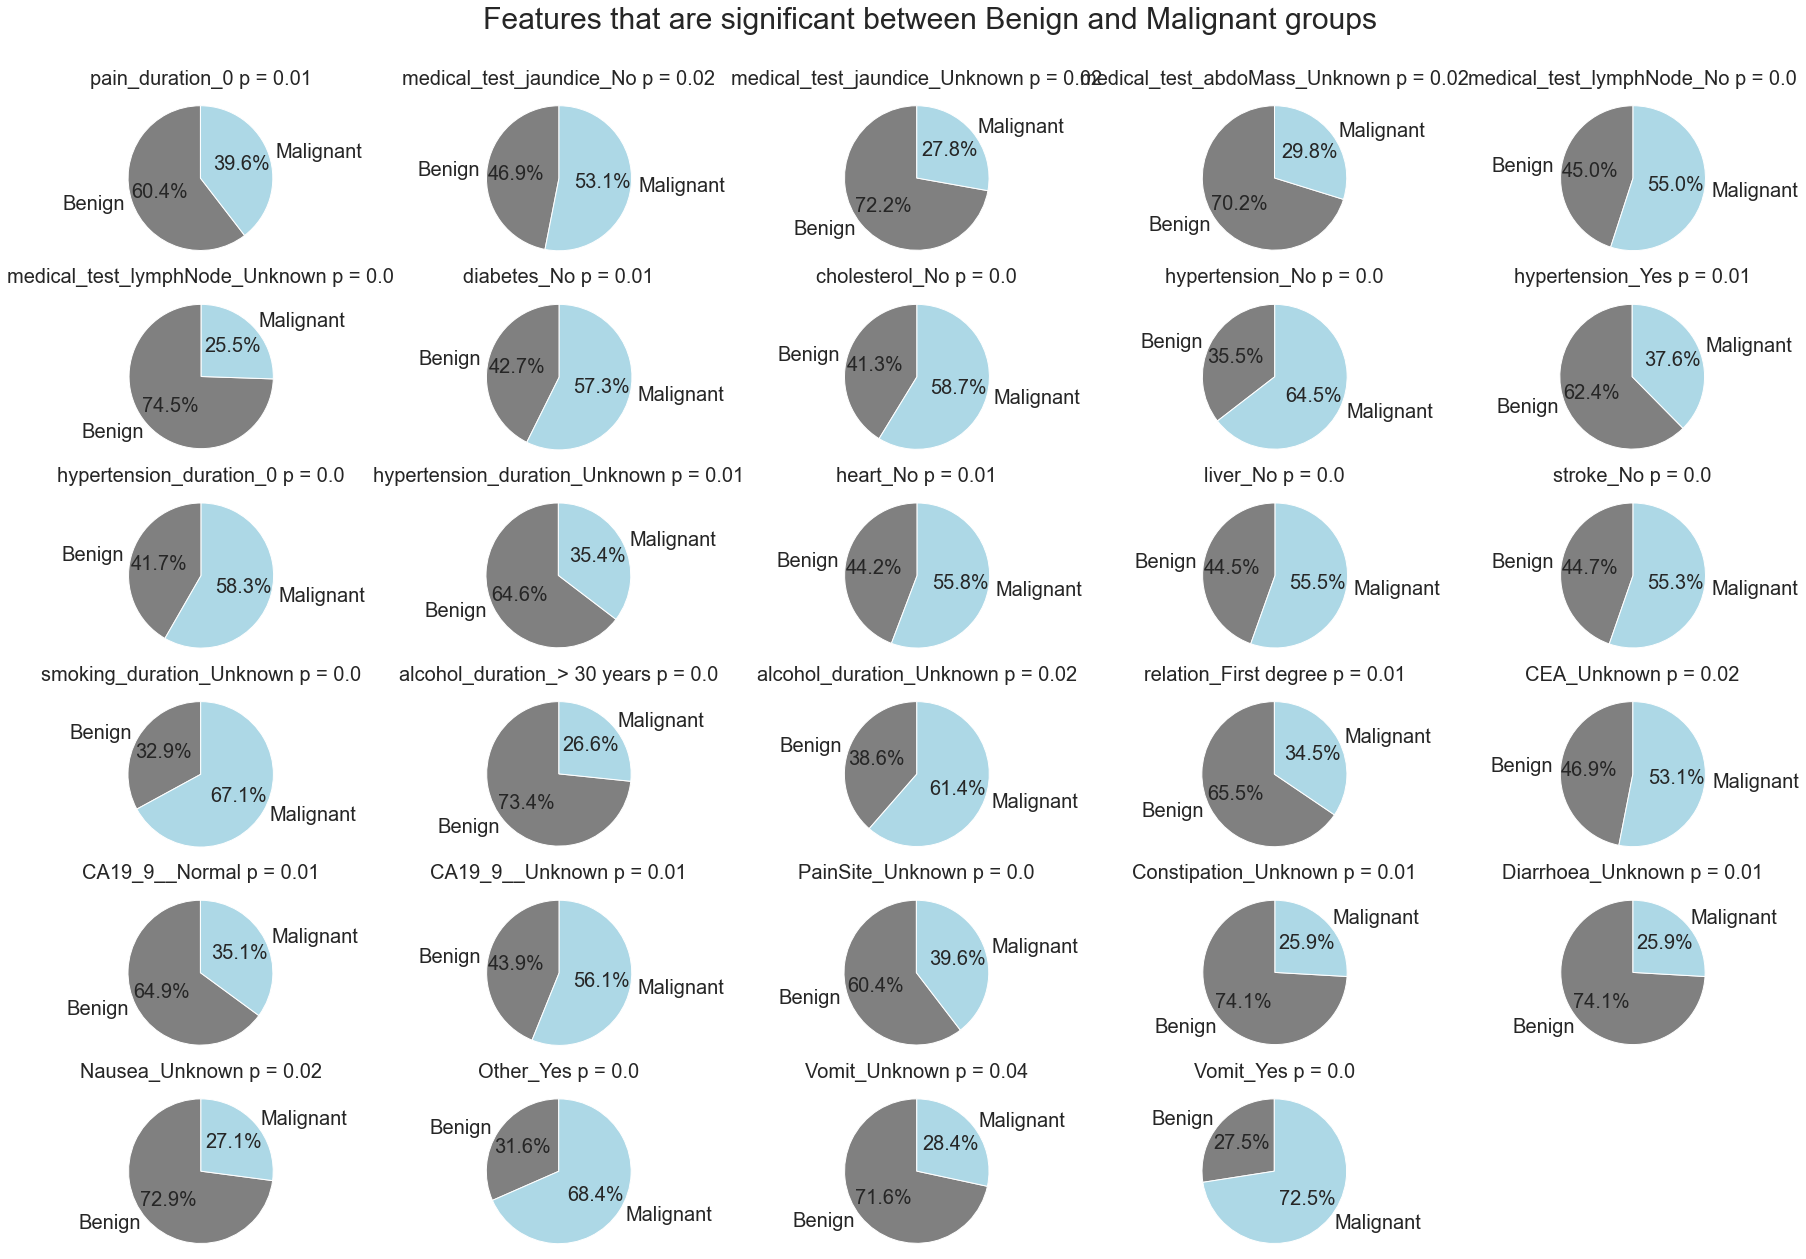

In [5]:
sig_i_imp, results_sig_imp = pc.significance_tests(tm_imp, params_imp, names_imp, sig_to_use = 0.05)
index_p_ = pc.plot_tests(tm_imp, params_imp, names_imp, results_sig_imp, sig_i_imp, group = 2, sig_to_use = 0.05)

## Below is a plot of features/markers that are significantly different between Pre-Malignant and Benign groups.


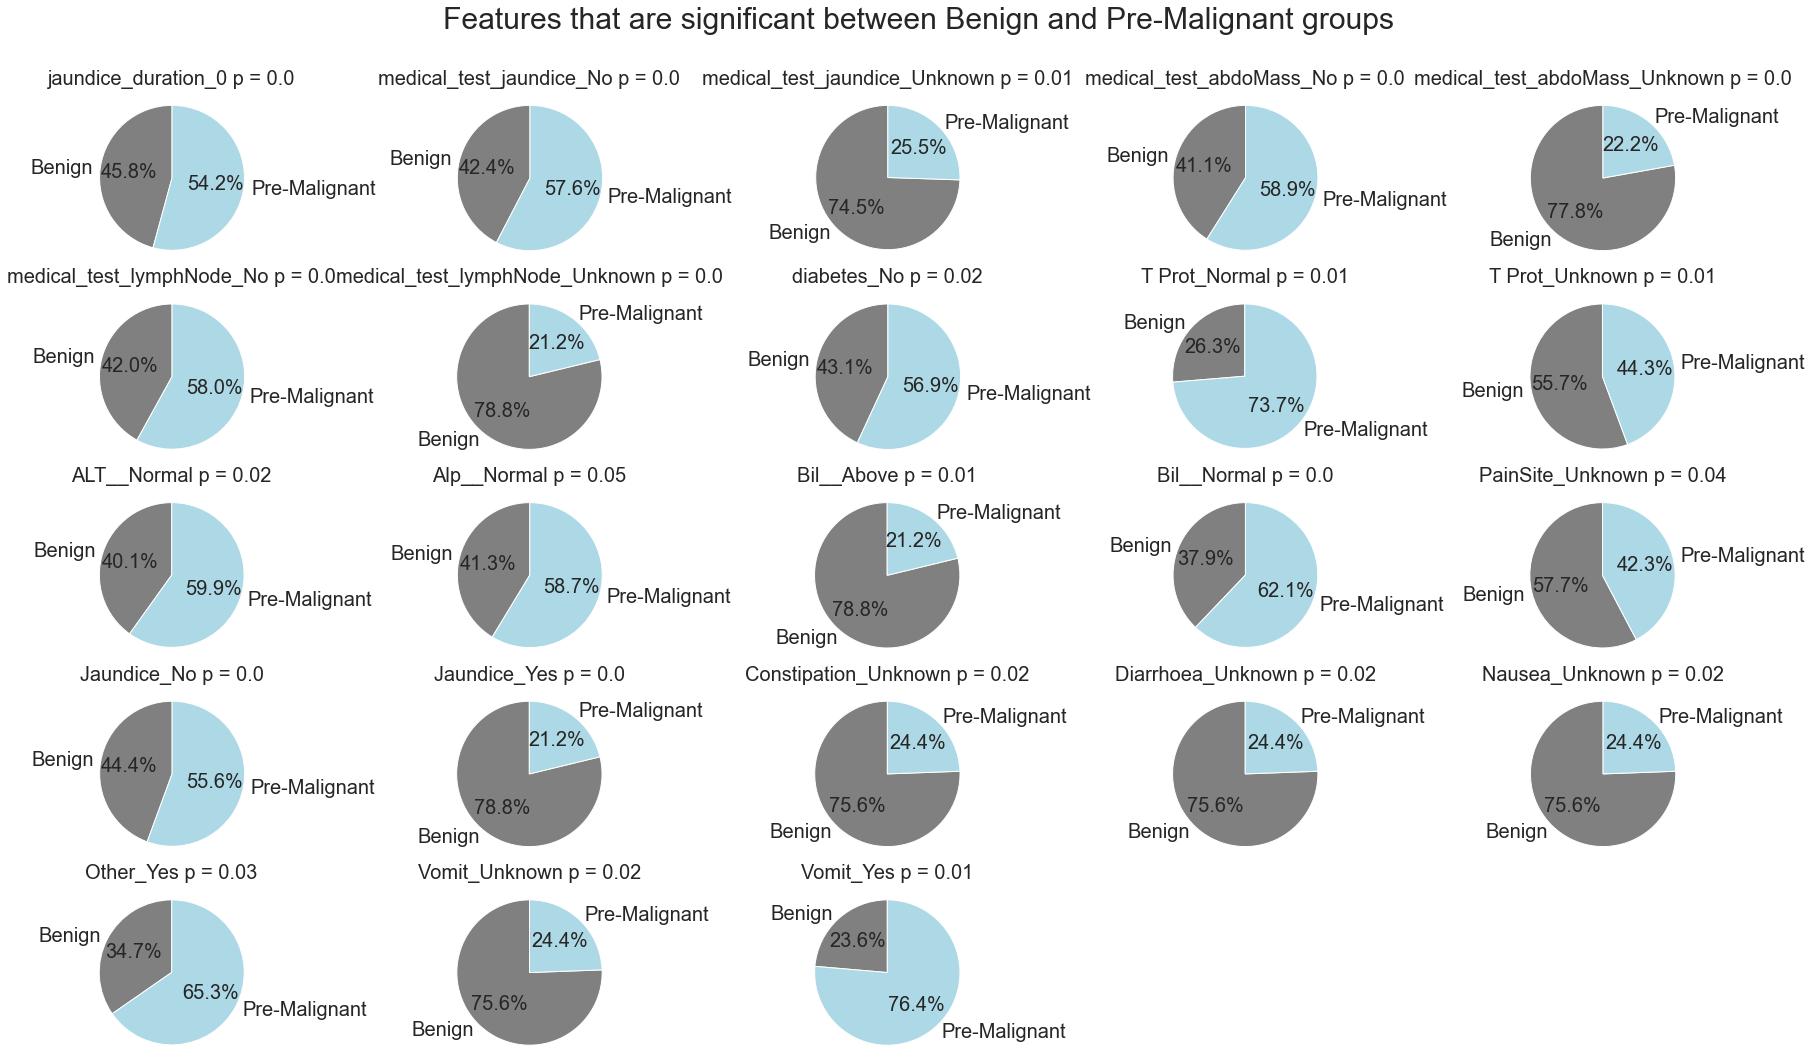

In [6]:
index_p_ = pc.plot_tests(tm_imp, params_imp, names_imp, results_sig_imp, sig_i_imp, group = 1, sig_to_use = 0.05)

## And now features that are significantly different between Pre-Malignant and Malignant groups.


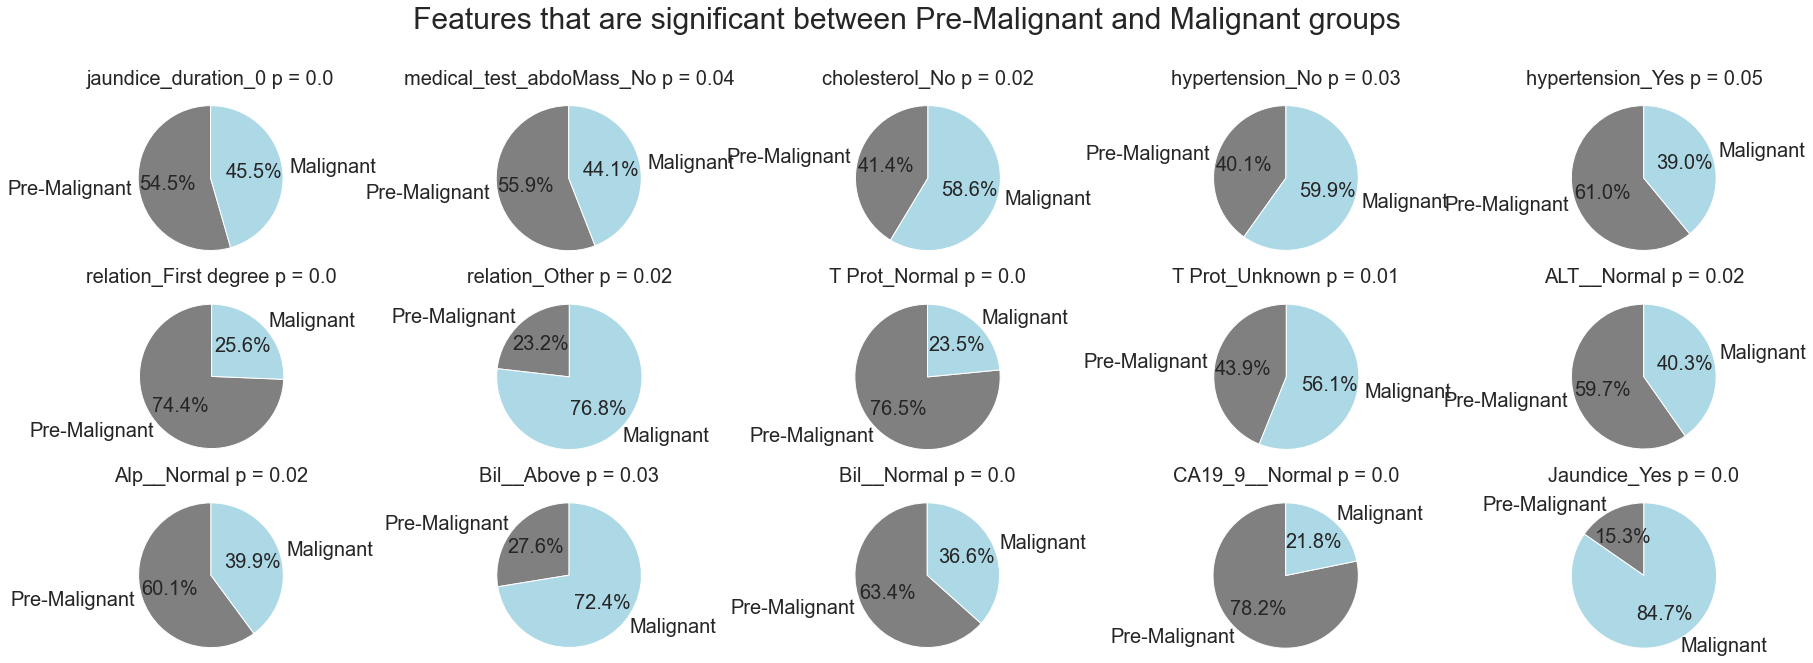

In [7]:
index_p_ = pc.plot_tests(tm_imp, params_imp, names_imp, results_sig_imp, sig_i_imp, group = 3,sig_to_use = 0.05)

# Now we can use only features that are significantly different across groups in our SVM classifier

* the accuracy is improved by about 7% to 48% accuracy


Mean Accuracy for all groups 48.0 %


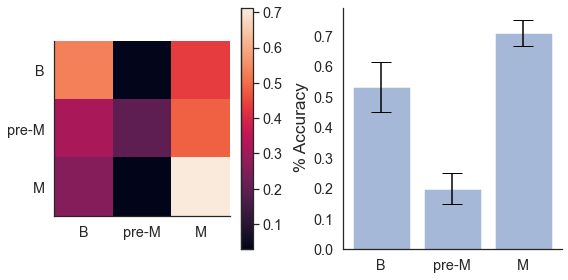

In [8]:
params_imp_sig = params_imp[sig_i_imp]
corr_ar_imp_s, corr_ar_imp_s_bm = pc.fit_model(params_imp_sig, tm_imp)
pc.plot_corr_(corr_ar_imp_s,  labels = ['B', 'pre-M', 'M'], ticks = [0,1,2])
print('Mean Accuracy for all groups ' + str(np.round(np.mean(np.diag(np.mean(corr_ar_imp_s,0)))*100)) + ' %')



# The Benign and Malignant classification is also imroved 

* the overall accuracy of the model with only singificant features goes up from 60 to 64% 

Mean Accuracy for just Malignant and Benign 64.0 %


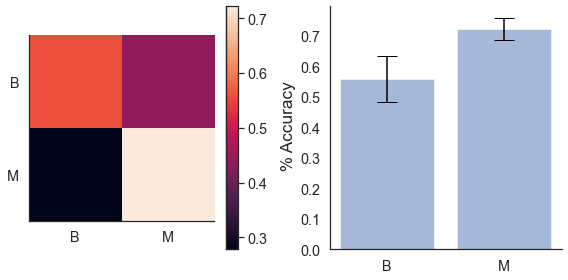

In [9]:
pc.plot_corr_(corr_ar_imp_s_bm,  labels = ['B', 'M'], ticks = [0,1])
print('Mean Accuracy for just Malignant and Benign ' + str(np.round(np.mean(np.diag(np.mean(corr_ar_imp_s_bm,0)))*100)) + ' %')


# Now let's see how this compares to the non-imputed data. First, let's run the support vector machine model using 5-fold cross-validation without doing any feature selection
 
 * figure below shows the average confusion matrices and the average classification accuracy for each group (Benign, Pre - Malignant and Malignant) 
 * the overall accuracy of this model is above chance (33%) but also only slightly - 44%  (41% in imputed data)

Mean Accuracy for all groups 44.0 %


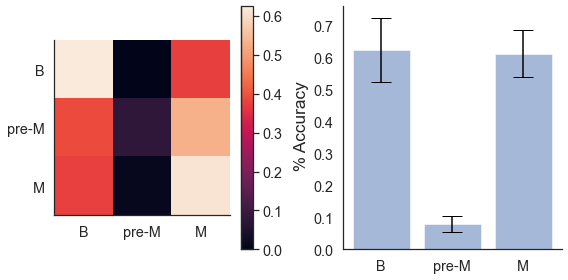

In [10]:
tm_cl, params_cl, names_cl = pc.load_data(data_folder, data = 'cleaned')
corr_ar_cl, conf_ar_cl_bm = pc.fit_model(params_cl, tm_cl)
pc.plot_corr_(corr_ar_cl,  labels = ['B', 'pre-M', 'M'], ticks = [0,1,2])
print('Mean Accuracy for all groups ' + str(np.round(np.mean(np.diag(np.mean(corr_ar_cl,0)))*100)) + ' %')


# Benign and Malignant groups in the non-imputed data 

* figure below shows the average confusion matrices and the average classification accuracy for only patients with Benign and Malignant lesions
* the overall accuracy of this model is also only slightly above chance - 61% and very similar to the imputed dataset 

Mean Accuracy for just Malignant and Benign 61.0 %


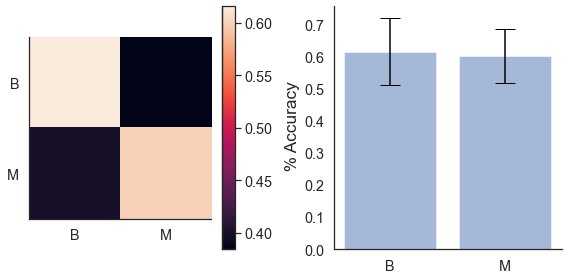

In [11]:
pc.plot_corr_(conf_ar_cl_bm,  labels = ['B', 'M'], ticks = [0,1])
print('Mean Accuracy for just Malignant and Benign ' + str(np.round(np.mean(np.diag(np.mean(conf_ar_cl_bm,0)))*100)) + ' %')



# Now we can use only features that are significantly different across groups in our SVM classifier

* the accuracy (by about 46%) is similar to that in the imputed data (48%)
* feature selection helped improve accuracy here as well


Mean Accuracy for all groups 46.0 %


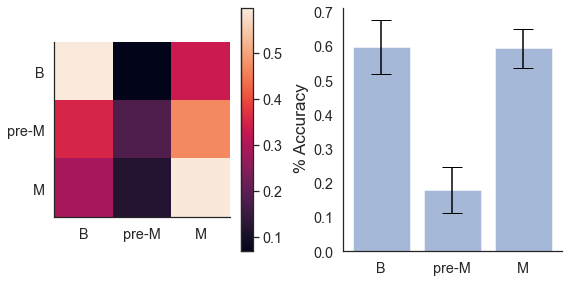

In [12]:
sig_i_cl, results_sig_cl = pc.significance_tests(tm_cl, params_cl, names_cl, sig_to_use = 0.001)
params_imp_sig = params_cl[sig_i_cl]
corr_ar_imp_s, corr_ar_imp_s_bm = pc.fit_model(params_imp_sig, tm_cl)
pc.plot_corr_(corr_ar_imp_s,  labels = ['B', 'pre-M', 'M'], ticks = [0,1,2])
print('Mean Accuracy for all groups ' + str(np.round(np.mean(np.diag(np.mean(corr_ar_imp_s,0)))*100)) + ' %')


# The Benign and Malignant classification is also imroved in the non-imputed data when we do feature selection 

* the overall accuracy of the model with only singificant features goes up from 60 to 65% and comparable to the imputed data (65 %)

Mean Accuracy for just Malignant and Benign 65.0 %


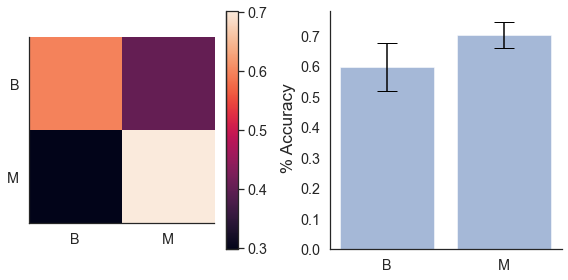

In [13]:
pc.plot_corr_(corr_ar_imp_s_bm,  labels = ['B', 'M'], ticks = [0,1])
print('Mean Accuracy for just Malignant and Benign ' + str(np.round(np.mean(np.diag(np.mean(corr_ar_imp_s_bm,0)))*100)) + ' %')


## Below is a plot of features/markers that are significantly different between Pre-Malignant and Benign groups in the non-imputed data


* note that there are fewer features that are statistically significant (as they are not split into dummy coding) but they overalap completely with those that are significant in the imputed data

e.g., age, pain duration, jaundice, medical test of lympnodes, diabetes, cholesterol, hypertension, heart, liver, stroke, relation subtype,

Non-Imputed data ['medical_test_jaundice' 'medical_test_lymphNode' 'hypertension']
Imputed data ['pain_duration_0' 'jaundice_duration_0' 'medical_test_jaundice_No'
 'medical_test_jaundice_Unknown' 'medical_test_abdoMass_No'
 'medical_test_abdoMass_Unknown' 'medical_test_lymphNode_No'
 'medical_test_lymphNode_Unknown' 'diabetes_No' 'cholesterol_No'
 'hypertension_No' 'hypertension_Yes' 'hypertension_duration_0'
 'hypertension_duration_Unknown' 'heart_No' 'liver_No' 'stroke_No'
 'smoking_duration_Unknown' 'alcohol_duration_> 30 years'
 'alcohol_duration_Unknown' 'relation_First degree' 'relation_Other'
 'CEA_Unknown' 'T Prot_Normal' 'T Prot_Unknown' 'ALT__Normal'
 'Alp__Normal' 'Bil__Above' 'Bil__Normal' 'CA19_9__Normal'
 'CA19_9__Unknown' 'PainSite_Unknown' 'Jaundice_No' 'Jaundice_Yes'
 'Constipation_Unknown' 'Diarrhoea_Unknown' 'Nausea_Unknown' 'Other_Yes'
 'Vomit_Unknown' 'Vomit_Yes']


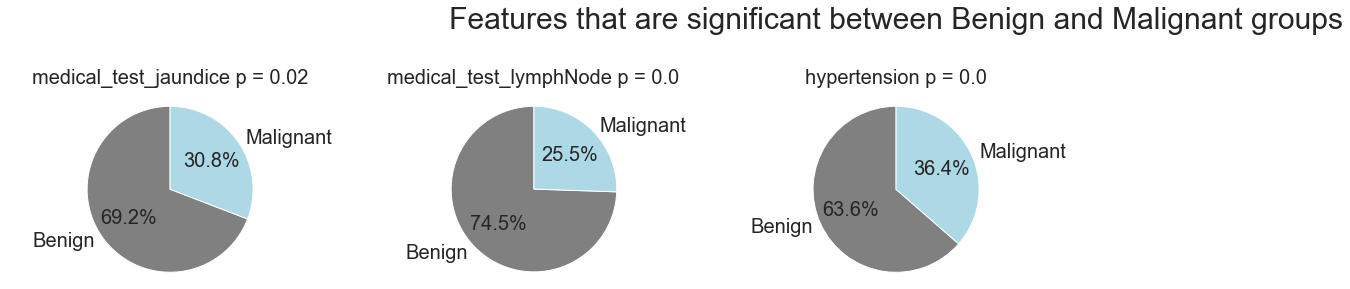

In [14]:
index_p_ = pc.plot_tests(tm_cl, params_cl, names_cl, results_sig_cl, sig_i_cl, group = 2, sig_to_use = 0.05)
sign_cleaned = names_cl[sig_i_cl]
sign_imputed = names_imp[sig_i_imp]

print('Non-Imputed data ' + str(np.asarray(sign_cleaned)))
print('Imputed data ' + str(np.asarray(sign_imputed)))